<a href="https://colab.research.google.com/github/katemartian/FiberPhotometryDataAnalysis/blob/master/LHA-DA_allTests_manuscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LHA-DA All tests

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/!lab/!FP/LHA Manuscript/

/content/drive/My Drive/!lab/!FP/LHA Manuscript


In [3]:
%run /content/drive/My\ Drive/!lab/FiberPhotometryDataAnalysis.ipynb

All Fiber Photometry functions are ready to use


In [4]:
mice = ['VD10','VD11','VD12','VD13','VD14']
outputs = ['LHA-VTA','DA VTA','LHA-DRN','DA VTA-DRN']
tests = ['APT','SCT','OFT','TST']

# Stats

In [5]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [6]:
%%R
install.packages("nlme")
install.packages("multcomp")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/nlme_3.1-150.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 789889 bytes (771 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [7]:
%%R
require(nlme)
require(multcomp)

R[write to console]: Loading required package: nlme

R[write to console]: Loading required package: multcomp

R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




# Save recordings to HDF file

In [8]:
folders = {'APT': ['/content/drive/My Drive/!lab/!FP/2019-02-13 VD mice Airpuff/raw/'],
           'SCT': ['/content/drive/My Drive/!lab/!FP/2019-02-21 VD mice Sucrose/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-03-01 LRD and VD Sucrose/raw/'],
           'OFT': ['/content/drive/My Drive/!lab/!FP/2019-04-11 LRD VD OFT-TST2/raw/'],
           'TST': ['/content/drive/My Drive/!lab/!FP/2019-03-26 LRD VD TST/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-04-11 LRD VD OFT-TST2/raw/']}

#### APT

In [9]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      apt_full_file_names.append(folder+f)
#apt_full_file_names

In [10]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','DA VTA','LHA-DRN','DA VTA-DRN']
  experiment = sepname[4]
  if experiment[-1] == 'f':
    trial = '1'
  else:
    trial = experiment[-1]
 

 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':

    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1])}
    signals   =  {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1])}

  elif mouse == 'VD11':

    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'DA VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
              'DA VTA-DRN': np.array(df_green.iloc[ ::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'DA VTA': np.array(df_red.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
              'DA VTA-DRN': np.array(df_red.iloc[1::2,1])}

  else:

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'DA VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
              'DA VTA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'DA VTA': np.array(df_red.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
              'DA VTA-DRN': np.array(df_red.iloc[ ::2,1])}

 # Time vector
  realtime_fp = create_realtime(10,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ----------------------------------------------------------
  key_name = find_files(folder,[mouse, experiment,'keypress'])[0]
  df_key = pd.read_csv(folder+'/'+key_name,sep=' ',index_col=False)
  realtime_ap = create_realtime(10,mm=list(df_key.iloc[:,1]),ss=list(df_key.iloc[:,2]),ms=list(df_key.iloc[:,3]))
  airpuff = time_to_seconds(realtime_ap,realtime_fp[0])

  for i in range(len(airpuff)):
    if airpuff[i] < 0:
      airpuff[i] = airpuff[i] + 3600

  airpuff = np.array(airpuff).reshape(len(airpuff),1)

  airpuff = airpuff - 0.5

  events = {'airpuff': np.array(airpuff).reshape(len(airpuff),1)}
    
  raw = FiberPhotometryRecording(signals,references,time_,events,mouse=mouse,test='APT',trial=trial)
  raw.saveRecording('LHA-DA.h5')
  print(raw.mouse,raw.test,raw.trial)

VD11 APT 1
VD10 APT 1
VD14 APT 1
VD13 APT 1
VD12 APT 1


#### SCT

In [20]:
test = 'SCT'
sct_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      sct_full_file_names.append(folder+f)
#sct_full_file_names

In [21]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'e':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1])}

  elif [mouse,trial] in [['VD12','1']]:

    references = {'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
               'DA VTA-DRN': np.array(df_green.iloc[ ::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_red.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
               'DA VTA-DRN': np.array(df_red.iloc[1::2,1])}
  
  else:
  
    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
               'DA VTA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_red.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
               'DA VTA-DRN': np.array(df_red.iloc[ ::2,1])}
 
 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  # Sucrose licking measured by Anymaze
  licks = df_am['Lick active']
  consumption = event_onoffset(licks,time_am)
  if len(consumption) != 0:
    consumption = adjust_intervals_durations(consumption,1,1)

  if len(consumption.shape) == 1:
    consumption = consumption.reshape(1,2)
    print(consumption)

  events = {'consumption': consumption,
             'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement},
                     'licks': {'time': time_am,
                             'values': licks}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCT',trial)
  raw.saveRecording('LHA-DA.h5')
  print(raw.mouse,raw.test,raw.trial)

VD12 SCT 1
VD10 SCT 1
VD13 SCT 1
VD11 SCT 1
VD14 SCT 1
VD14 SCT 2
VD10 SCT 2
VD10 SCT 3
VD11 SCT 3
VD11 SCT 2
VD12 SCT 3
VD12 SCT 2
VD13 SCT 2
VD13 SCT 3
VD14 SCT 3
VD10 SCT 4
VD11 SCT 4
VD12 SCT 4
VD13 SCT 4
VD14 SCT 4


#### OFT

In [22]:
test = 'OFT'
oft_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      oft_full_file_names.append(folder+f)
#oft_full_file_names

In [23]:
for file_ in oft_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'T':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1])}

  else:

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                   'DA VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
               'DA VTA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                   'DA VTA': np.array(df_red.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
               'DA VTA-DRN': np.array(df_red.iloc[ ::2,1])}

  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobilityany_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'OFT',trial)
  raw.saveRecording('LHA-DA.h5')
  print(raw.mouse,raw.test,raw.trial)

VD10 OFT 1
VD11 OFT 1
VD14 OFT 1
VD12 OFT 1
VD13 OFT 1


#### TST

In [24]:
test = 'TST'
tst_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      tst_full_file_names.append(folder+f)
#tst_full_file_names

In [25]:
for file_ in tst_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'T':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 2 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  if mouse == 'VD10':

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1])}
  
  else:

    references = {'LHA-VTA': np.array(df_green.iloc[1::2,0]),
                  'DA VTA': np.array(df_green.iloc[1::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::2,1]),
              'DA VTA-DRN': np.array(df_green.iloc[1::2,1])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::2,0]),
                  'DA VTA': np.array(df_red.iloc[ ::2,0]),
                  'LHA-DRN': np.array(df_green.iloc[ ::2,1]),
              'DA VTA-DRN': np.array(df_red.iloc[ ::2,1])}

  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,test,trial)
  raw.saveRecording('LHA-DA.h5')
  print(raw.mouse,raw.test,raw.trial)

VD11 TST 1
VD10 TST 1
VD13 TST 1
VD12 TST 1
VD14 TST 1
VD10 TST 2
VD11 TST 2
VD12 TST 2
VD14 TST 2
VD13 TST 2


# Processing

In [26]:
info_for_array = {'airpuff': {'window': [-5.0,5.0],
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (12,10)},
              'consumption': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (24,10)},
               'immobility': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                             'figsize': (24,10)}}

In [ ]:
for test in tests:
  for mouse in mice:
    for trial in ['1','2','3','4']:

        r = FiberPhotometryRecording()
        r.loadRecording('LHA-DA.h5',mouse,test,trial)
        if r.rawSignals != {}:
          r.getDFF(airpls_lambda=5e3,smooth_win=1)#,plot=True,save=True)
          if r.measurements is not None:
            r.smoothMeasurements(smooth_win=2)
            r.interpolateMeasurements(period=0.1)
          r.getPerievents(info_for_array)#,plot=True,save=True)
          r.saveRecording('LHA-DA.h5')
        del r

In [28]:
# exp = FiberPhotometryExperiment('LHA-DA.h5','OFT')
# exp.removeExperiment('all')

# Summary plot 

#### Set attributes

In [29]:
with h5py.File('LHA-DA.h5', 'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests
  f.attrs['good recordings'] = [['VD10','APT','1','LHA-DRN'],
                                ['VD10','APT','1','LHA-VTA'],
                                #['VD11','APT','1','LHA-DRN'],
                                ['VD11','APT','1','LHA-VTA'],
                                ['VD11','APT','1','DA VTA'],
                                ['VD11','APT','1','DA VTA-DRN'],
                                ['VD12','APT','1','LHA-DRN'],
                                #['VD12','APT','1','LHA-VTA'],
                                ['VD12','APT','1','DA VTA'],
                                #['VD12','APT','1','DA VTA-DRN'],
                                ['VD13','APT','1','LHA-DRN'],
                                #['VD13','APT','1','LHA-VTA'],
                                ['VD13','APT','1','DA VTA'],
                                #['VD13','APT','1','DA VTA-DRN'],
                                ['VD14','APT','1','LHA-DRN'],
                                ['VD14','APT','1','LHA-VTA'],
                                ['VD14','APT','1','DA VTA'],
                                #['VD14','APT','1','DA VTA-DRN'],
                                ['VD10','SCT','1','LHA-DRN'],
                                ['VD10','SCT','2','LHA-DRN'],
                                ['VD10','SCT','3','LHA-DRN'],
                                ['VD10','SCT','4','LHA-DRN'],
                                ['VD10','SCT','1','LHA-VTA'],
                                ['VD10','SCT','2','LHA-VTA'],
                                ['VD10','SCT','3','LHA-VTA'],
                                ['VD10','SCT','4','LHA-VTA'],
                                ['VD11','SCT','1','LHA-DRN'],
                                ['VD11','SCT','2','LHA-DRN'],
                                ['VD11','SCT','3','LHA-DRN'],
                                ['VD11','SCT','4','LHA-DRN'],
                                ['VD11','SCT','1','LHA-VTA'],
                                ['VD11','SCT','2','LHA-VTA'],
                                ['VD11','SCT','3','LHA-VTA'],
                                #['VD11','SCT','4','LHA-VTA'],
                                ['VD11','SCT','1','DA VTA'],
                                #['VD11','SCT','2','DA VTA'],
                                ['VD11','SCT','3','DA VTA'],
                                ['VD11','SCT','4','DA VTA'],#?
                                #['VD11','SCT','1','DA VTA-DRN'],
                                #['VD11','SCT','2','DA VTA-DRN'],
                                #['VD11','SCT','3','DA VTA-DRN'],
                                #['VD11','SCT','4','DA VTA-DRN'],
                                #['VD12','SCT','1','LHA-DRN'],
                                #['VD12','SCT','2','LHA-DRN'],
                                ['VD12','SCT','3','LHA-DRN'],
                                ['VD12','SCT','4','LHA-DRN'],
                                #['VD12','SCT','1','LHA-VTA'],
                                #['VD12','SCT','2','LHA-VTA'],
                                ['VD12','SCT','3','LHA-VTA'],
                                ['VD12','SCT','4','LHA-VTA'],
                                #['VD12','SCT','1','DA VTA'],
                                #['VD12','SCT','2','DA VTA'],
                                ['VD12','SCT','3','DA VTA'],
                                ['VD12','SCT','4','DA VTA'],
                                ['VD12','SCT','1','DA VTA-DRN'],#?
                                #['VD12','SCT','2','DA VTA-DRN'],
                                ['VD12','SCT','3','DA VTA-DRN'],
                                ['VD12','SCT','4','DA VTA-DRN'],
                                ['VD13','SCT','1','LHA-DRN'],
                                ['VD13','SCT','2','LHA-DRN'],
                                ['VD13','SCT','3','LHA-DRN'],
                                ['VD13','SCT','4','LHA-DRN'],
                                #['VD13','SCT','1','LHA-VTA'],
                                #['VD13','SCT','2','LHA-VTA'],#?
                                #['VD13','SCT','3','LHA-VTA'],
                                ['VD13','SCT','4','LHA-VTA'],
                                ['VD13','SCT','1','DA VTA'],#?
                                ['VD13','SCT','2','DA VTA'],#?
                                #['VD13','SCT','3','DA VTA'],#?
                                ['VD13','SCT','4','DA VTA'],#?
                                ['VD13','SCT','1','DA VTA-DRN'],#?
                                ['VD13','SCT','2','DA VTA-DRN'],#?
                                ['VD13','SCT','3','DA VTA-DRN'],#?
                                ['VD13','SCT','4','DA VTA-DRN'],
                                #['VD14','SCT','1','LHA-DRN'],
                                ['VD14','SCT','2','LHA-DRN'],
                                #['VD14','SCT','3','LHA-DRN'],#?
                                ['VD14','SCT','4','LHA-DRN'],#?
                                ['VD14','SCT','1','LHA-VTA'],
                                ['VD14','SCT','2','LHA-VTA'],
                                ['VD14','SCT','3','LHA-VTA'],
                                ['VD14','SCT','4','LHA-VTA'],
                                ['VD14','SCT','1','DA VTA'],
                                ['VD14','SCT','2','DA VTA'],
                                #['VD14','SCT','3','DA VTA'],
                                #['VD14','SCT','4','DA VTA'],
                                #['VD14','SCT','1','DA VTA-DRN'],
                                ['VD14','SCT','2','DA VTA-DRN'],
                                ['VD14','SCT','3','DA VTA-DRN'],#?
                                ['VD14','SCT','4','DA VTA-DRN'],
                                #['VD10','OFT','1','LHA-DRN'],
                                ['VD10','OFT','1','LHA-VTA'],
                                ['VD11','OFT','1','LHA-DRN'],
                                ['VD11','OFT','1','LHA-VTA'],
                                ['VD11','OFT','1','DA VTA'],
                                ['VD11','OFT','1','DA VTA-DRN'],
                                #['VD12','OFT','1','LHA-DRN'],
                                ['VD12','OFT','1','LHA-VTA'],
                                ['VD12','OFT','1','DA VTA'],
                                #['VD12','OFT','1','DA VTA-DRN'],
                                #['VD13','OFT','1','LHA-DRN'],
                                #['VD13','OFT','1','LHA-VTA'],
                                #['VD13','OFT','1','DA VTA'],
                                #['VD13','OFT','1','DA VTA-DRN'],
                                #['VD14','OFT','1','LHA-DRN'],
                                #['VD14','OFT','1','LHA-VTA'],
                                ['VD14','OFT','1','DA VTA'],
                                #['VD14','OFT','1','DA VTA-DRN'],
                                ['VD10','TST','1','LHA-DRN'],
                                #['VD10','TST','2','LHA-DRN'],#?
                                #['VD10','TST','1','LHA-VTA'],#?
                                ['VD10','TST','2','LHA-VTA'],
                                ['VD11','TST','1','LHA-DRN'],
                                ['VD11','TST','2','LHA-DRN'],
                                #['VD11','TST','1','LHA-VTA'],
                                ['VD11','TST','2','LHA-VTA'],#?
                                #['VD11','TST','1','DA VTA'],
                                ['VD11','TST','2','DA VTA'],
                                #['VD11','TST','1','DA VTA-DRN'],
                                ['VD11','TST','2','DA VTA-DRN'],
                                ['VD12','TST','1','LHA-DRN'],#?
                                #['VD12','TST','2','LHA-DRN'],#?
                                #['VD12','TST','1','LHA-VTA'],
                                ['VD12','TST','2','LHA-VTA'],#?
                                #['VD12','TST','1','DA VTA'],
                                ['VD12','TST','2','DA VTA'],#?
                                #['VD12','TST','1','DA VTA-DRN'],
                                #['VD12','TST','2','DA VTA-DRN'],#?
                                ['VD13','TST','1','LHA-DRN'],#?
                                #['VD13','TST','2','LHA-DRN'],
                                #['VD13','TST','1','LHA-VTA'],
                                #['VD13','TST','2','LHA-VTA'],
                                #['VD13','TST','1','DA VTA'],
                                #['VD13','TST','2','DA VTA'],
                                #['VD13','TST','1','DA VTA-DRN'],
                                #['VD13','TST','2','DA VTA-DRN'],
                                ['VD14','TST','1','LHA-DRN'],
                                #['VD14','TST','2','LHA-DRN'],
                                ['VD14','TST','1','LHA-VTA'],
                                #['VD14','TST','2','LHA-VTA'],
                                ['VD14','TST','1','DA VTA'],
                                ['VD14','TST','2','DA VTA']]#?
                                #['VD14','TST','1','DA VTA-DRN'],
                                #['VD14','TST','2','DA VTA-DRN']]

#### APT

In [35]:
apt = FiberPhotometryTest('LHA-DA.h5','APT')

Experiment information for test APT is successfully loaded.


In [36]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,2]]})

VD11,1 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for DA VTA airpuff-onset
VD11,1 .
Saved dF/F mean traces for DA VTA-DRN airpuff-onset
VD10,1 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for LHA-DRN airpuff-onset
VD10,1 VD11,1 VD14,1 .
Saved dF/F mean traces for LHA-VTA airpuff-onset


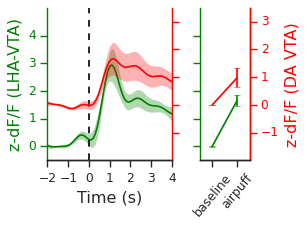

In [37]:
apt.plotMeans('LHA-VTA','airpuff',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['baseline','airpuff'],xlim=[-2,4],
              ylim=[-0.5,5],yticks=[0,1,2,3,4],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-2,3.5],yticks1=[-1,0,1,2,3],color1='red',ylab1='z-dF/F (DA VTA)',
              figsize=(4,3),save=True,imgname='./results/LHA-DA/LHA-DA_APT_LHA-VTA-DA-VTA_airpuff-onset.pdf')
plt.show()

In [ ]:
df = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'],
                         save=True,csvname='./stats/LHA-DA_APT_airpuff-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-DA_APT_airpuff-onset_auc.csv')
df$period = as.factor(df$period)

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
ranks <- rank(da$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = da)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
baseline - airpuff == 0  -3.0000     0.5774  -5.196 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
baseline - airpuff == 0  -4.0000     0.9129  -4.382 1.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- sin

#### SCT

In [39]:
sct = FiberPhotometryTest('LHA-DA.h5','SCT')

Experiment information for test SCT is successfully loaded.


In [40]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[3,4]],
                        'consumption-offset': [[-2,0],[0,2]]})

VD11,1 VD11,3 VD11,4 VD12,3 VD12,4 VD13,1 VD13,2 VD13,4 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA consumption-offset
VD11,1 VD11,3 VD11,4 VD12,3 VD12,4 VD13,1 VD13,2 VD13,4 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA consumption-onset
VD11,1 VD11,3 VD11,4 VD12,3 VD12,4 VD13,1 VD13,2 VD13,4 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA immobility-offset
VD11,1 VD11,3 VD11,4 VD12,3 VD12,4 VD13,1 VD13,2 VD13,4 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA immobility-onset
VD12,1 VD12,3 VD12,4 VD13,1 VD13,2 VD13,3 VD13,4 VD14,2 VD14,3 VD14,4 .
Saved dF/F mean traces for DA VTA-DRN consumption-offset
VD12,1 VD12,3 VD12,4 VD13,1 VD13,2 VD13,3 VD13,4 VD14,2 VD14,3 VD14,4 .
Saved dF/F mean traces for DA VTA-DRN consumption-onset
VD12,1 VD12,3 VD12,4 VD13,1 VD13,2 VD13,3 VD13,4 VD14,2 VD14,3 VD14,4 .
Saved dF/F mean traces for DA VTA-DRN immobility-offset
VD12,1 VD12,3 VD12,4 VD13,1 VD13,2 VD13,3 VD13,4 VD14,2 VD14,3 VD14,4 .
Saved dF/F mean traces for DA VTA-DRN immobilit

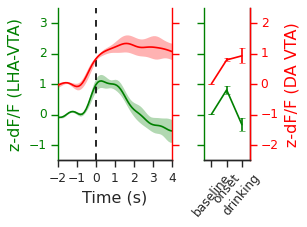

In [41]:
sct.plotMeans('LHA-VTA','consumption',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['baseline','onset','drinking'],
              ylim=[-1.5,3.5],ylab='z-dF/F (LHA-VTA)',xlim=[-2,4],
              ylim1=[-2.5,2.5],ylab1='z-dF/F (DA VTA)',color1='red',
              figsize=(4,3),save=True,imgname='./results/LHA-DA/LHA-DA_SCT_LHA-VTA-DA-VTA_consumption-onset_means.pdf')
plt.show()

In [ ]:
df = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'],
                         save=True,csvname='./stats/LHA-DA_SCT_consumption-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-DA_SCT_consumption-onset_auc.csv')

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
ranks <- rank(da$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = da)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
drinking - baseline == 0   -3.000      1.528  -1.964  0.08994 .  
onset - baseline == 0       6.000      1.528   3.928  0.00017 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
drinking - baseline == 0    6.000      1.616   3.713 0.000405 ***
onset - baseline == 0       6.0

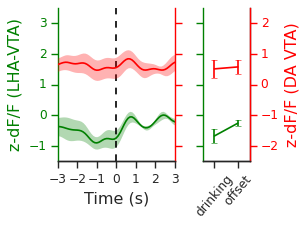

In [42]:
sct.plotMeans('LHA-VTA','consumption','offset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['drinking','offset'],
              ylim=[-1.5,3.5],ylab='z-dF/F (LHA-VTA)',xlim=[-3,3],
              ylim1=[-2.5,2.5],ylab1='z-dF/F (DA VTA)',color1='red',
              figsize=(4,3),save=True,imgname='./results/LHA-DA/LHA-DA_SCT_LHA-VTA-DA-VTA_consumption-offset_means.pdf')
plt.show()

#### OFT

In [45]:
oft = FiberPhotometryTest('LHA-DA.h5','OFT')

Experiment information for test OFT is successfully loaded.


In [46]:
oft.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-1,0],[0,1.5],[1.5,3]]})

VD11,1 VD12,1 VD14,1 .
Saved dF/F mean traces for DA VTA immobility-offset
VD11,1 VD12,1 VD14,1 .
Saved dF/F mean traces for DA VTA immobility-onset
VD11,1 .
Saved dF/F mean traces for DA VTA-DRN immobility-offset
VD11,1 .
Saved dF/F mean traces for DA VTA-DRN immobility-onset
VD11,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
VD11,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
VD10,1 VD11,1 VD12,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
VD10,1 VD11,1 VD12,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
VD10,1 VD11,1 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for movement immobility-offset.
VD10,1 VD11,1 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for movement immobility-onset.


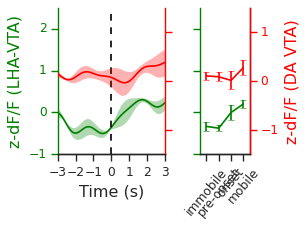

In [47]:
oft.plotMeans('LHA-VTA','immobility','offset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              subplot_ratio=[5,2.3],figsize=(4,3),save=True,
              imgname='./results/LHA-DA/LHA-DA_OFT_LHA-VTA-DA-VTA_immobility-offset_means.pdf')
plt.show()

In [ ]:
df = oft.getDataFrameAUC('immobility','offset',['immobile','pre-onset','onset','mobile'],
                         save=True,csvname='./stats/LHA-DA_OFT_mobile-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-DA_OFT_mobile-onset_auc.csv')

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
ranks <- rank(da$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = da)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)   
mobile - immobile == 0      6.3333     2.0276   3.124  0.00506 **
onset - immobile == 0       4.0000     2.0276   1.973  0.12192   
pre-onset - immobile == 0  -0.3333     2.0276  -0.164  0.99687   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)
mobile - immobile == 0      2.6667

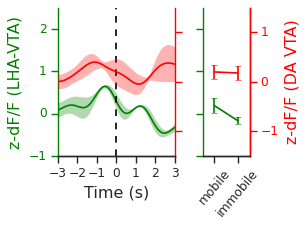

In [48]:
oft.plotMeans('LHA-VTA','immobility','onset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['mobile','immobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              figsize=(4,3),save=True,
              imgname='./results/LHA-DA/LHA-DA_OFT_LHA-VTA-DA-VTA_immobility-onset_means.pdf')
plt.show()

#### TST

In [51]:
tst = FiberPhotometryTest('LHA-DA.h5','TST')

Experiment information for test TST is successfully loaded.


In [52]:
tst.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-0.5,0],[0,1],[1,3]]})

VD11,2 VD12,2 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA immobility-offset
VD11,2 VD12,2 VD14,1 VD14,2 .
Saved dF/F mean traces for DA VTA immobility-onset
VD11,2 .
Saved dF/F mean traces for DA VTA-DRN immobility-offset
VD11,2 .
Saved dF/F mean traces for DA VTA-DRN immobility-onset
VD10,1 VD11,1 VD11,2 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
VD10,1 VD11,1 VD11,2 VD12,1 VD13,1 VD14,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
VD10,2 VD11,2 VD12,2 VD14,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
VD10,2 VD11,2 VD12,2 VD14,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
VD10,1 VD10,2 VD11,1 VD11,2 VD12,1 VD12,2 VD13,1 VD13,2 VD14,1 VD14,2 .
Saved dF/F mean traces for movement immobility-offset.
VD10,1 VD10,2 VD11,1 VD11,2 VD12,1 VD12,2 VD13,1 VD13,2 VD14,1 VD14,2 .
Saved dF/F mean traces for movement immobility-onset.


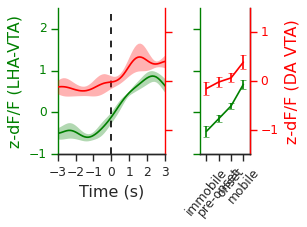

In [53]:
tst.plotMeans('LHA-VTA','immobility','offset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              subplot_ratio=[5,2.3],figsize=(4,3),save=True,
              imgname='./results/LHA-DA/LHA-DA_TST_LHA-VTA-DA-VTA_immobility-offset_means.pdf')
plt.show()

In [ ]:
df = tst.getDataFrameAUC('immobility','offset',['immobile','pre-onset','onset','mobile'],
                    save=True,csvname='./stats/LHA-DA_TST_mobile-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-DA_TST_mobile-onset_auc.csv')

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
ranks <- rank(da$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = da)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0     12.0000     0.8819  13.607  < 1e-05 ***
onset - immobile == 0       8.0000     0.8819   9.071  < 1e-05 ***
pre-onset - immobile == 0   4.0000     0.8819   4.536 1.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0    

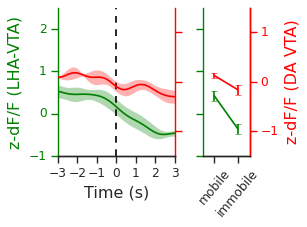

In [54]:
tst.plotMeans('LHA-VTA','immobility','onset',output2='DA VTA',
              plot_type='mean and SEM',
              periods=['mobile','immobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (DA VTA)',color1='red',
              figsize=(4,3),save=True,
              imgname='./results/LHA-DA/LHA-DA_TST_LHA-VTA-DA-VTA_immobility-onset_means.pdf')
plt.show()

# Example trace

The recording for mouse VD14 in the experiment APT-1 is successfully loaded.


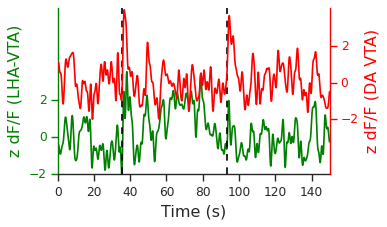

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','APT','1')

r.plotExample(['LHA-VTA','DA VTA'],event='airpuff',
              t0=70,t1=220,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)', ylabel1='z dF/F (DA VTA)',
              ylim=[-2,7],ylim1=[-5,4.1],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-DA/LHA-DA_APT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment SCT-2 is successfully loaded.


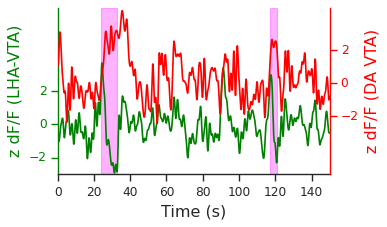

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','SCT','2')

r.plotExample(['LHA-VTA','DA VTA'],'consumption',
              t0=30,t1=180,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)', ylabel1='z dF/F (DA VTA)',
              ylim=[-3,7],ylim1=[-5.5,4.55],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-DA/LHA-DA_SCT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment OFT-1 is successfully loaded.


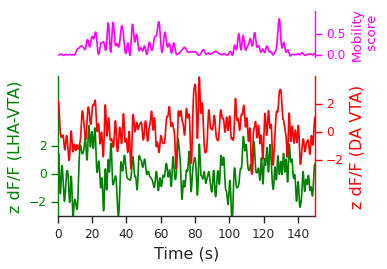

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','OFT','1')

r.plotExample(['LHA-VTA','DA VTA'],measure='movement',
              t0=170,t1=320,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)',ylabel1='z dF/F (DA VTA)',
              ylim=[-3,7],ylim1=[-6,4],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.05,1.05],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-DA/LHA-DA_OFT_example.pdf')
plt.show()

The recording for mouse VD14 in the experiment TST-1 is successfully loaded.


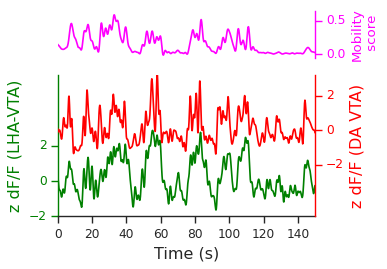

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-DA.h5','VD14','TST','1')

r.plotExample(['LHA-VTA','DA VTA'],measure='movement',
              t0=370,t1=520,
              color='green',color1='red',
              ylabel='z dF/F (LHA-VTA)',ylabel1='z dF/F (DA VTA)',
              ylim=[-2,6],ylim1=[-5,3.2],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.05,0.65],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-DA/LHA-DA_TST_example.pdf')
plt.show()